In [1]:
import requests
import os
import pyunpack
import pandas as pd
import re
import numpy as np
# This command will basically import all the modules from pycaret that are necessary for classification tasks
from pycaret.classification import *

In [2]:
import pickle
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df = pd.read_csv('symptom/Training.csv')
data = df.sample(frac=1).reset_index(drop=True)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['prognosis'] = le.fit_transform(data['prognosis'])

In [10]:
data_sampled = data[data['prognosis'] < 5] 

data_sampled.head(20)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
65,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
76,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(data_sampled, test_size=0.2, random_state=42)

In [17]:
# Setting up the classifier
# Pass the complete dataset as data and the featured to be predicted as target
clf=setup(data=x_train, target='prognosis')

,Description,Value
0,session_id,5103
1,Target,prognosis
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(480, 133)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,132
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
# This model will be used to compare all the model along with the cross validation
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4500
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2300
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2150
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3100
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0980
svm,SVM - Linear Kernel,0.9993,0.0000,0.9992,0.9994,0.9993,0.9993,0.9993,0.2260
ridge,Ridge Classifier,0.9982,0.0000,0.9981,0.9985,0.9982,0.9981,0.9982,0.2130
gbc,Gradient Boosting Classifier,0.9982,1.0000,0.9982,0.9985,0.9982,0.9981,0.9981,2.2970
xgboost,Extreme Gradient Boosting,0.9982,1.0000,0.9982,0.9985,0.9982,0.9981,0.9981,1.0100
lightgbm,Light Gradient Boosting Machine,0.9982,1.0000,0.9982,0.9985,0.9982,0.9981,0.9981,0.3160


In [18]:
# Whenenver we compare different models or build a model, the model uses deault
#hyperparameter values. Hence, we need to tune our model to get better performance

tuned_et=tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


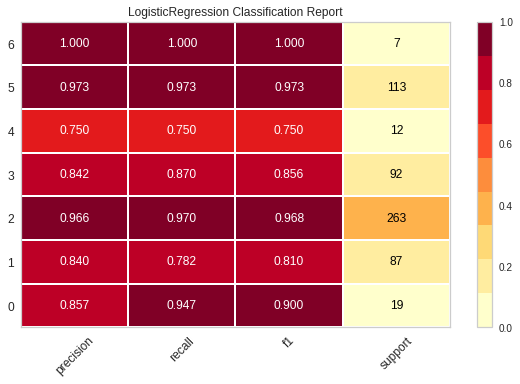

In [14]:
plot_model(tuned_et, plot='class_report')

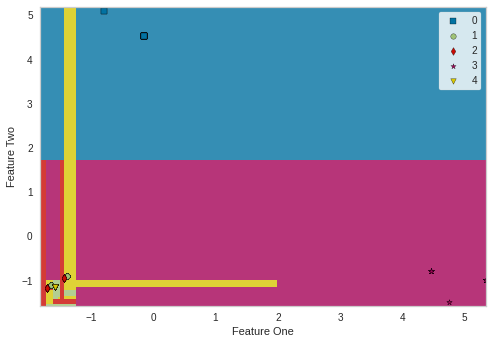

In [19]:
plot_model(tuned_et, plot='boundary')

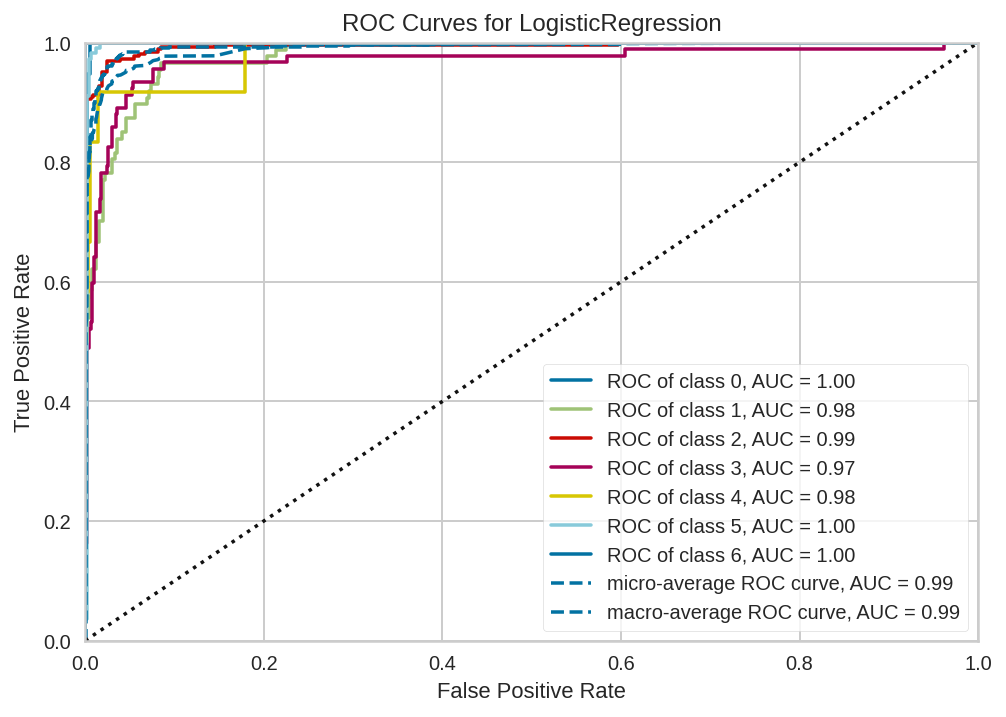

In [16]:
plot_model(tuned_et, plot='auc', scale = 2)

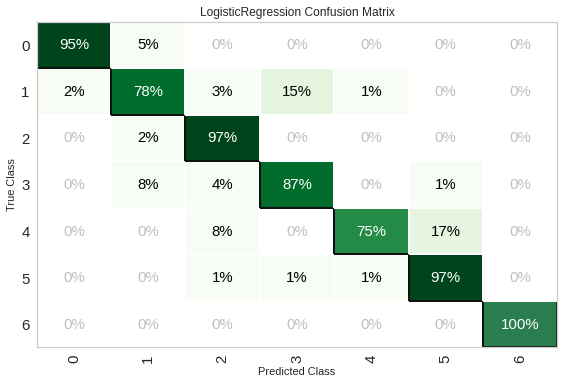

In [17]:
plot_model(tuned_et,plot='confusion_matrix', plot_kwargs = {'percent' : True})

In [18]:
# finalize the model
final_best = finalize_model(tuned_et)# save model to disk
save_model(final_best, 'tuned_et')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='cancer_type', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=3.364, class_weight={}, dual=False,
                 

In [19]:
# predict on hold-out
#X_test_temp = X_test.drop('gesture', axis = 1, inplace = True)
predict_model(tuned_et, raw_score = True, data=x_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9089,0.9891,0.8724,0.9069,0.9075,0.8684,0.8687


,GPRIN1,EFNB1,FABP4,MGP,AC020916-1,CDC7,CHADL,VPS9D1-AS1,RPL10P6,OASL,...,AC026403-1,cancer_type,Label,Score_0,Score_1,Score_2,Score_3,Score_4,Score_5,Score_6
8546,3.919875,0.813379,4.152416,2.666173,2.418171,0.086900,3.914029,0.005425,4.732197,4.834992,...,2.638833,3,3,0.0,0.1614,0.0001,0.8385,0.0000,0.0,0.0
6265,6.381220,3.279088,2.437904,3.001747,2.331159,3.777624,2.662712,4.439050,5.878553,5.561130,...,4.243361,5,5,0.0,0.0000,0.0000,0.0000,0.0000,1.0,0.0
7272,4.116686,0.849140,1.973167,1.556079,1.820698,3.901697,5.265726,0.053179,5.434327,5.518941,...,1.221881,2,2,0.0,0.0000,0.9999,0.0001,0.0000,0.0,0.0
7284,3.791752,1.361454,3.550019,1.442113,2.657304,2.396810,3.995242,0.201541,5.356665,6.323382,...,2.280689,2,2,0.0,0.0000,1.0000,0.0000,0.0000,0.0,0.0
5376,2.598317,1.626434,1.090453,3.412317,2.258199,0.358330,4.891749,0.000000,4.536315,5.246395,...,2.899331,3,3,0.0,0.0423,0.0008,0.9569,0.0000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,4.005373,3.099105,2.893429,1.779316,2.229385,2.022124,4.273530,0.322491,5.129949,6.062830,...,2.496379,2,2,0.0,0.0000,0.9992,0.0007,0.0000,0.0,0.0
638,3.333577,1.768610,3.077030,2.776726,2.922377,2.864530,4.304898,0.059302,4.809694,6.133600,...,2.423815,2,2,0.0,0.0001,0.9993,0.0006,0.0000,0.0,0.0
4016,4.104240,1.415965,2.984796,2.220694,2.543327,2.903552,5.083196,0.171013,5.560107,5.595813,...,2.385469,2,2,0.0,0.0001,0.9992,0.0008,0.0000,0.0,0.0
9215,5.752006,0.984723,3.425971,3.342266,1.898591,2.105833,5.615373,0.014696,2.597214,2.955640,...,3.312272,1,1,0.0,0.9627,0.0072,0.0299,0.0002,0.0,0.0
